In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("March_Madness_Data.csv")
df
df.head

<bound method NDFrame.head of       year         Team record  wins  games       adjoe      adjde  \
0     2008      Memphis   38–2    38     40  116.962972  86.068591   
1     2008         UCLA   34–4    34     38  116.196369  86.765719   
2     2008    Wisconsin   31–5    31     36  112.569727  85.390558   
3     2008   Louisville   27–9    27     36  112.086592  86.536100   
4     2008         Duke   28–6    28     34  115.835603  89.864041   
...    ...          ...    ...   ...    ...         ...        ...   
5467  2019      Gonzaga   33-4    33     37  124.361806  91.007109   
5468  2020       Kansas   27-3    27     30  116.080800  87.722046   
5469  2021      Gonzaga   31-1    31     32  125.921012  90.928899   
5470  2022      Gonzaga   28-4    28     32  120.307038  89.886542   
5471  2023  Connecticut   31-8    31     39  121.478653  91.209374   

      power_rating   efg  efgd  ...  eff_hgt       exp   pake      pase  \
0         0.971452  52.7  43.4  ...  80.5180  1.605242

In [3]:
df.rename(columns = {
    'year' : 'Year',
    'Team' : 'Team',
    'record' : 'Record',
    'wins' : 'Wins',
    'games' : 'Games',
    'adjoe' : 'Adjusted Offensive Efficiency',
    'adjde' : 'Adjusted Defensive Efficiency',
    'power_rating' : 'Power Rating',
    'efg' : 'Effective Field Goal Percentage',
    'efgd' : 'Effective Field Goal Percentage Defense',
    'ftr' : 'Free Throw Rate',
    'ftrd' : 'Free Throw Rate Defense',
    'tov%' : 'Turnover Percentage',
    'tov%d' : 'Forced Turnover Percentage',
    'oreb%' : 'Offensive Rebound Percentage',
    'op oreb%' : 'Opponent Offensive Rebound Percentage',
    'raw_tempo' : 'Raw Tempo',
    '2p%' : 'Two Point Percentage',
    '2p%d' : 'Two Point Percentage Defense',
    '3p%' : 'Three Point Percentage',
    '3p%d' : 'Three Point Percentage Defense',
    'blk%' : 'Block Percentage',
    'blked%' : 'Blocked Percentage',
    'ast%' : 'Assist Percentage',
    'op_ast%' : 'Opponent Assist Percentage',
    '3p_rate' : 'Three Point Rate',
    '3p_rate_d' : 'Three Point Rate Defense',
    'adj_t' : 'Adjusted Tempo',
    'avg_hgt' : 'Average Height',
    'eff_hgt' : 'Effective Height',
    'exp' : 'Experience',
    'pake' : 'Pake',
    'pase' : 'Pase',
    'talent' : 'Talent',
    'ft%' : 'Free Throw Percentage',
    'op_ft%' : 'Opponent Free Throw Percentage',
    'off_ppp' : 'Offensive Points Per Possesion',
    'def_ppp' : 'Defensive Points Per Possesion',
    'elite_sos' : 'Elite Strength of Schedule'
}, inplace = True)
df.columns

Index(['Year', 'Team', 'Record', 'Wins', 'Games',
       'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
       'Power Rating', 'Effective Field Goal Percentage',
       'Effective Field Goal Percentage Defense', 'Free Throw Rate',
       'Free Throw Rate Defense', 'Turnover Percentage',
       'Forced Turnover Percentage', 'Offensive Rebound Percentage',
       'Opponent Offensive Rebound Percentage', 'Raw Tempo',
       'Two Point Percentage', 'Two Point Percentage Defense',
       'Three Point Percentage', 'Three Point Percentage Defense',
       'Block Percentage', 'Blocked Percentage', 'Assist Percentage',
       'Opponent Assist Percentage', 'Three Point Rate',
       'Three Point Rate Defense', 'Adjusted Tempo', 'Average Height',
       'Effective Height', 'Experience', 'Pake', 'Pase', 'Talent',
       'Free Throw Percentage', 'Opponent Free Throw Percentage',
       'Offensive Points Per Possesion', 'Defensive Points Per Possesion',
       'Elite Strength of S

In [4]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Year                                       0
Team                                       0
Record                                     0
Wins                                       0
Games                                      0
Adjusted Offensive Efficiency              0
Adjusted Defensive Efficiency              0
Power Rating                               0
Effective Field Goal Percentage            0
Effective Field Goal Percentage Defense    0
Free Throw Rate                            0
Free Throw Rate Defense                    0
Turnover Percentage                        0
Forced Turnover Percentage                 0
Offensive Rebound Percentage               0
Opponent Offensive Rebound Percentage      0
Raw Tempo                                  0
Two Point Percentage                       0
Two Point Percentage Defense               0
Three Point Percentage                     0
Three Point Percentage Defense             0
Block Percentage                           0
Blocked Pe

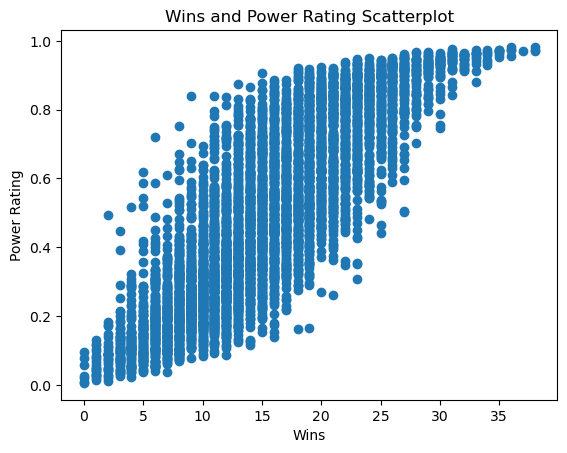

In [8]:
plt.scatter(df['Wins'], df['Power Rating'])
plt.xlabel("Wins")       #use xlabel and ylabel to add labels to the axes
plt.ylabel("Power Rating")
plt.title('Wins and Power Rating Scatterplot')     # use title to add a title for the entire plot
plt.show()

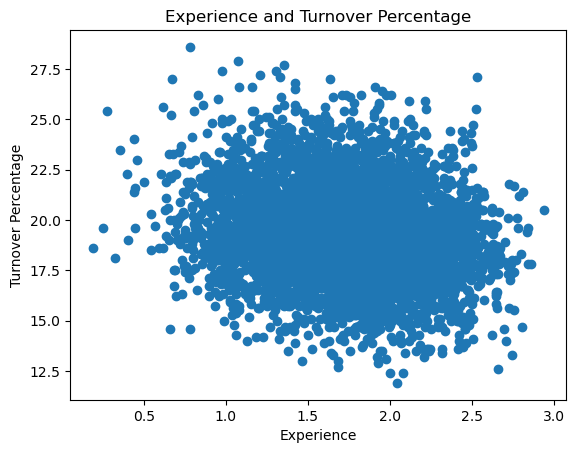

In [58]:
plt.scatter(df['Experience'], df['Turnover Percentage'])
plt.xlabel("Experience")       #use xlabel and ylabel to add labels to the axes
plt.ylabel("Turnover Percentage")
plt.title('Experience and Turnover Percentage')     # use title to add a title for the entire plot
plt.show()

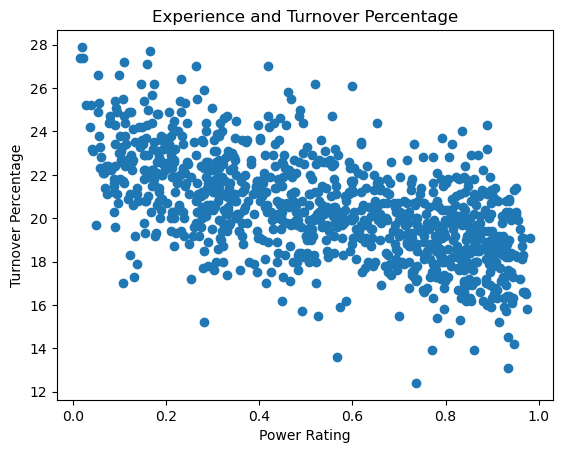

In [46]:
plt.scatter(df['Power Rating'], df['Turnover Percentage'])
plt.xlabel("Power Rating")       #use xlabel and ylabel to add labels to the axes
plt.ylabel("Turnover Percentage")
plt.title('Experience and Turnover Percentage')     # use title to add a title for the entire plot
plt.show()

In [59]:
df_binary = df[['Adjusted Offensive Efficiency', 'Power Rating']]
X = np.array(df_binary['Adjusted Offensive Efficiency']).reshape(-1,1)   # .reshape(-1, 1) shapes the array so there is only one column
Y = np.array(df_binary['Power Rating']).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)

0.7735310034241734

In [60]:
df_binary = df[['Adjusted Defensive Efficiency', 'Power Rating']]
X = np.array(df_binary['Adjusted Defensive Efficiency']).reshape(-1,1)   # .reshape(-1, 1) shapes the array so there is only one column
Y = np.array(df_binary['Power Rating']).reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X_train, Y_train)
regr.score(X_test, Y_test)

0.67746787239264

In [61]:
correlations = {}
columns = ['Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
           'Effective Field Goal Percentage',
       'Effective Field Goal Percentage Defense', 'Free Throw Rate',
       'Free Throw Rate Defense', 'Turnover Percentage',
       'Forced Turnover Percentage', 'Offensive Rebound Percentage',
       'Opponent Offensive Rebound Percentage', 'Raw Tempo',
       'Two Point Percentage', 'Two Point Percentage Defense',
       'Three Point Percentage', 'Three Point Percentage Defense',
       'Block Percentage', 'Blocked Percentage', 'Assist Percentage',
       'Opponent Assist Percentage', 'Three Point Rate',
       'Three Point Rate Defense', 'Adjusted Tempo', 'Average Height',
       'Effective Height', 'Experience', 'Pake', 'Pase', 'Talent',
       'Free Throw Percentage', 'Opponent Free Throw Percentage',
       'Offensive Points Per Possesion', 'Defensive Points Per Possesion',
       'Elite Strength of Schedule']

for column in columns:
    df_binary = df[[column, 'Power Rating']]
    X = np.array(df_binary[column]).reshape(-1,1)   # .reshape(-1, 1) shapes the array so there is only one column
    Y = np.array(df_binary['Power Rating']).reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    regr = LinearRegression()
    regr.fit(X_train, Y_train)
    correlations[column] = regr.score(X_test, Y_test)
correlations = sorted(correlations.items(), key=lambda x:x[1], reverse = True)
print (correlations)

offense_columns = ['Effective Field Goal Percentage', 'Free Throw Rate', 
                   'Turnover Percentage', 'Offensive Rebound Percentage',
                  'Two Point Percentage', 'Three Point Percentage',
                   'Blocked Percentage', 'Assist Percentage',
                   'Three Point Rate', 'Adjusted Tempo', 'Average Height',
                   'Experience', 'Talent', 'Free Throw Percentage', 
                   'Offensive Points Per Possesion']

defense_columns = ['Effective Field Goal Percentage Defense', 'Free Throw Rate Defense', 
                   'Forced Turnover Percentage', 'Opponent Offensive Rebound Percentage',
                  'Two Point Percentage Defense', 'Three Point Percentage Defense',
                   'Block Percentage', 'Opponent Assist Percentage',
                   'Three Point Rate Defense', 'Adjusted Tempo', 'Average Height',
                   'Experience', 'Talent', 'Opponent Free Throw Percentage', 
                   'Defensive Points Per Possesion']


[('Adjusted Offensive Efficiency', 0.7468048457148462), ('Adjusted Defensive Efficiency', 0.6971737872491727), ('Offensive Points Per Possesion', 0.5715964921818444), ('Elite Strength of Schedule', 0.5203469158891745), ('Talent', 0.5122992962245418), ('Defensive Points Per Possesion', 0.3894015192021618), ('Effective Field Goal Percentage Defense', 0.37987795837180593), ('Effective Field Goal Percentage', 0.3193232180088931), ('Two Point Percentage Defense', 0.29725210102403643), ('Two Point Percentage', 0.2505116910470031), ('Turnover Percentage', 0.21845281502918956), ('Effective Height', 0.19059744862052552), ('Average Height', 0.18944371082668687), ('Three Point Percentage', 0.16200304378121522), ('Block Percentage', 0.14926271490969978), ('Three Point Percentage Defense', 0.13830811865569792), ('Offensive Rebound Percentage', 0.11061571722717112), ('Opponent Offensive Rebound Percentage', 0.09991480799493124), ('Assist Percentage', 0.09598850707227646), ('Free Throw Rate Defense',

In [62]:
offense_columns = ['Effective Field Goal Percentage', 'Free Throw Rate', 
                   'Turnover Percentage', 'Offensive Rebound Percentage',
                  'Two Point Percentage', 'Three Point Percentage',
                   'Blocked Percentage', 'Assist Percentage',
                   'Three Point Rate', 'Adjusted Tempo', 'Average Height',
                   'Experience', 'Talent', 'Free Throw Percentage', 
                   'Offensive Points Per Possesion']

offensive_correlations = {}
for column in offense_columns:
    df_binary = df[[column, 'Adjusted Offensive Efficiency']]
    X = np.array(df_binary[column]).reshape(-1,1)   # .reshape(-1, 1) shapes the array so there is only one column
    Y = np.array(df_binary['Adjusted Offensive Efficiency']).reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    regr = LinearRegression()
    regr.fit(X_train, Y_train)
    offensive_correlations[column] = regr.score(X_test, Y_test)
offensive_correlations = sorted(offensive_correlations.items(), key=lambda x:x[1], reverse = True)
print (offensive_correlations)

[('Offensive Points Per Possesion', 0.8638680990265284), ('Effective Field Goal Percentage', 0.5491009395831586), ('Two Point Percentage', 0.390995241845683), ('Talent', 0.37897755012798473), ('Turnover Percentage', 0.3449526062469285), ('Three Point Percentage', 0.3105307895183289), ('Free Throw Percentage', 0.15847929784987247), ('Average Height', 0.1437173032662178), ('Assist Percentage', 0.056943067452524865), ('Offensive Rebound Percentage', 0.05588797184934169), ('Blocked Percentage', 0.01635692793284238), ('Free Throw Rate', 0.013141561370025423), ('Experience', 0.012225630140587085), ('Three Point Rate', 0.0024829784628233043), ('Adjusted Tempo', 0.0009394481438850244)]


In [63]:
defense_columns = ['Effective Field Goal Percentage Defense', 'Free Throw Rate Defense', 
                   'Forced Turnover Percentage', 'Opponent Offensive Rebound Percentage',
                  'Two Point Percentage Defense', 'Three Point Percentage Defense',
                   'Block Percentage', 'Opponent Assist Percentage',
                   'Three Point Rate Defense', 'Adjusted Tempo', 'Average Height',
                   'Experience', 'Talent', 'Opponent Free Throw Percentage', 
                   'Defensive Points Per Possesion']

defensive_correlations = {}
for column in defense_columns:
    df_binary = df[[column, 'Adjusted Defensive Efficiency']]
    X = np.array(df_binary[column]).reshape(-1,1)   # .reshape(-1, 1) shapes the array so there is only one column
    Y = np.array(df_binary['Adjusted Defensive Efficiency']).reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    regr = LinearRegression()
    regr.fit(X_train, Y_train)
    defensive_correlations[column] = regr.score(X_test, Y_test)
defensive_correlations = sorted(defensive_correlations.items(), key=lambda x:x[1], reverse = True)
print (defensive_correlations)

[('Defensive Points Per Possesion', 0.7540199794874529), ('Effective Field Goal Percentage Defense', 0.6302063518212933), ('Two Point Percentage Defense', 0.49626723279245966), ('Talent', 0.3995308272214322), ('Three Point Percentage Defense', 0.3295557935209018), ('Block Percentage', 0.246679694962483), ('Average Height', 0.1558919760715307), ('Opponent Offensive Rebound Percentage', 0.06896820612813848), ('Forced Turnover Percentage', 0.06472225347052951), ('Opponent Assist Percentage', 0.05075299069958372), ('Free Throw Rate Defense', 0.029925644451698763), ('Adjusted Tempo', 0.028904097245704308), ('Opponent Free Throw Percentage', 0.015393953721080766), ('Three Point Rate Defense', 0.0038165069462626766), ('Experience', 0.0012154039939461514)]
